# Table of Contents
1. [Predict Urea 2015-Now](#2015-now)
2. [Predict Urea 1996-2005](#1996-2005)
3. [Predict Urea with China Market Influence](#8/3/15-2/25/16,-China-market-influence)
4. [Predict Urea Sec1 2012-Now](#Sec1-2012-now)
5. [Predict Urea with Green Markets](#Green-Markets)

## If you need to see any additional descriptive graphs look at Project 1 Revisit 2.ipynb
## If you want to see the Spark outputs for the different models look at UREA Predictions.ipynb

# 2015-now
[Top](#Table-of-Contents)

In [1]:
import pandas as pd

original = pd.read_csv("C:/Users/msteinme/Documents/project1revisit2.csv")
print (original.shape)
original.head()

(3653, 13)


,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea,earlydate,dollar,crude,corn,urea,latestdate,crude.1,urea.1
0,3/1/12,78.789,109.27,654.00,406,1/1/96,84.76,19.06,371.50,235,2/1/14,96.71,450
1,3/2/12,79.403,107.17,655.00,411,1/2/96,84.69,19.24,376.00,235,2/2/14,96.71,450
2,3/3/12,79.403,107.17,655.00,NaN,1/3/96,85.11,19.34,377.50,235,2/3/14,95.72,450
3,3/4/12,79.403,107.17,655.00,NaN,1/4/96,85.22,19.37,373.00,235,2/4/14,96.46,450
4,3/5/12,79.300,107.18,660.75,409,1/5/96,85.06,19.65,369.75,235,2/5/14,96.76,450


In [4]:
oneyear = original[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn', '2monthurea']][1038:1457]
oneyear = oneyear.dropna()
print(oneyear.shape)
oneyear.head()

(276, 5)


,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea
1040,1/5/15,91.378,50.52,414.75,342
1041,1/6/15,91.499,48.46,413.50,341
1042,1/7/15,91.890,49.08,404.75,333
1043,1/8/15,92.368,49.28,402.75,337
1044,1/9/15,91.935,48.99,408.25,335


In [5]:
oneyear.describe()

,Spotdollar,2monthcrude,2monthcorn,2monthurea
count,276.000000,276.000000,276.000000,276.000000
mean,96.526641,47.133696,382.639493,265.391304
std,1.955055,8.605065,17.113060,33.279737
min,91.378000,28.350000,352.750000,188.000000
25%,95.065750,41.987500,369.687500,243.500000
50%,96.545000,47.010000,380.375000,265.500000
75%,97.977250,52.710000,392.000000,287.000000
max,100.330000,62.000000,441.000000,342.000000


In [9]:
oneyear.corr()

,Spotdollar,2monthcrude,2monthcorn,2monthurea
Spotdollar,1.000000,-0.442540,-0.222541,-0.721187
2monthcrude,-0.442540,1.000000,0.202078,0.703077
2monthcorn,-0.222541,0.202078,1.000000,0.347105
2monthurea,-0.721187,0.703077,0.347105,1.000000


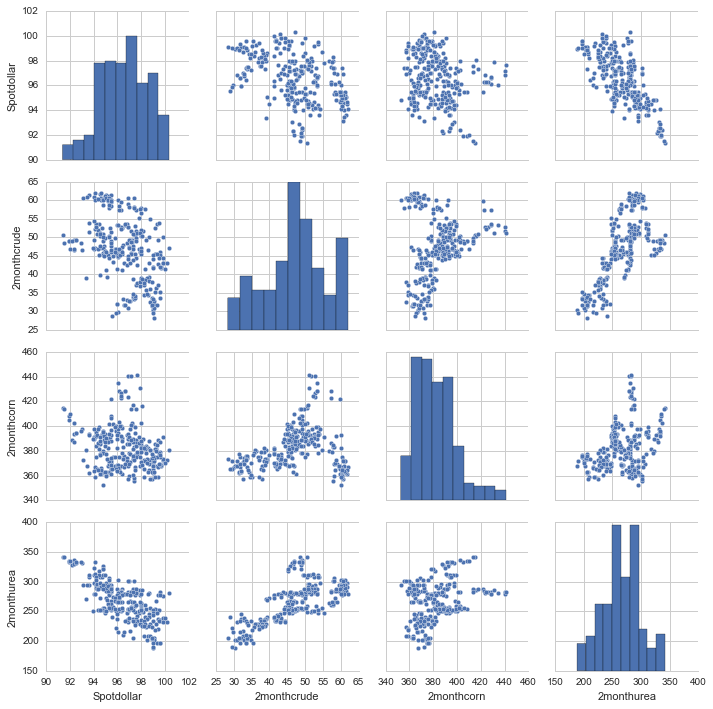

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', context='notebook')
#cols= ['Spotdollar', '2monthcrude', '2monthcorn', '2monthurea','precipitation', 'temp']
sns.pairplot(oneyear, size=2.5);
plt.show()

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X=oneyear[['Spotdollar', '2monthcrude', '2monthcorn']].values
y=oneyear['2monthurea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(n_estimators=200, criterion='mse',random_state=1,max_depth=10, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 32.518, test: 182.640
R^2 train: 0.969, test: 0.850


In [13]:
#do a few times to see which model parameters are the best overall
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [15]:
rdf_model_oneyear = fit_predict_model(X_train,y_train)
print (rdf_model_oneyear.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X=oneyear[['Spotdollar', '2monthcrude', '2monthcorn']].values
y=oneyear['2monthurea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=150, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 35.054, test: 176.847
R^2 train: 0.967, test: 0.855


In [17]:
print (forest.predict([98.148,34.58,359.5]))
print (forest.predict([98.211,35.58,357]))
print (forest.predict([98.352,36.15,355.75]))
print (forest.predict([98.214,36.3,356.25]))
print (forest.predict([97.592,36.33,356.5]))
print (forest.predict([97.34,37.75,358.25]))
print (forest.predict([97.071,39.82,359]))
print (forest.predict([97.255,38.77,359.5]))

[ 219.519]
[ 223.72466667]
[ 225.39544444]
[ 225.638]
[ 228.86455556]
[ 229.20455556]
[ 256.41336863]
[ 232.82255556]


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

In [18]:
actual1 = 232
actual2 = 230
actual3 = 213
actual4 = 210
actual5 = 213
actual6 = 213
actual7 = 213
actual8 = 213
error1_s = abs(219.519- actual1)/actual1 * 100
error2_s = abs(223.72466667- actual2)/actual2 * 100
error3_s = abs(225.39544444- actual3)/actual3 * 100
error4_s = abs(225.638- actual4)/actual4 * 100
error5_s = abs(228.86455556- actual5)/actual5 * 100
error6_s = abs(229.20455556- actual6)/actual6 * 100
error7_s = abs(256.41336863- actual7)/actual7 * 100
error8_s = abs(232.82255556- actual8)/actual8 * 100
print (error1_s)
print (error2_s)
print (error3_s)
print (error4_s)
print (error5_s)
print (error6_s)
print (error7_s)
print (error8_s)

5.379741379310342
2.7284057956521717
5.819457483568078
7.44666666666667
7.448148150234749
7.6077725633802755
20.38186320657276
9.306364112676063


# 1996-2005
[Top](#Table-of-Contents)

In [97]:
import pandas as pd

original = pd.read_csv("C:/Users/msteinme/Documents/project1revisit2.csv")
print (original.shape)
original.head()

(3653, 13)


,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea,earlydate,dollar,crude,corn,urea,latestdate,crude.1,urea.1
0,3/1/12,78.789,109.27,654.00,406,1/1/96,84.76,19.06,371.50,235,2/1/14,96.71,450
1,3/2/12,79.403,107.17,655.00,411,1/2/96,84.69,19.24,376.00,235,2/2/14,96.71,450
2,3/3/12,79.403,107.17,655.00,NaN,1/3/96,85.11,19.34,377.50,235,2/3/14,95.72,450
3,3/4/12,79.403,107.17,655.00,NaN,1/4/96,85.22,19.37,373.00,235,2/4/14,96.46,450
4,3/5/12,79.300,107.18,660.75,409,1/5/96,85.06,19.65,369.75,235,2/5/14,96.76,450


In [98]:
sectionold = original[['earlydate', 'dollar','crude','corn', 'urea']]
sectionold.tail()

,earlydate,dollar,crude,corn,urea
3648,12/27/05,91.19,58.68,224.25,325
3649,12/28/05,91.21,60.36,225.00,325
3650,12/29/05,91.10,60.92,220.00,325
3651,12/30/05,91.17,61.90,225.00,325
3652,12/31/05,91.17,61.90,225.00,325


In [3]:
sectionold.describe()

,dollar,crude,corn,urea
count,3653.000000,3653.000000,3653.000000,3653.000000
mean,98.785749,28.608995,247.887216,187.880099
std,10.270574,12.380077,49.293976,54.378359
min,80.530000,11.020000,182.500000,105.000000
25%,89.140000,20.110000,217.250000,135.000000
50%,98.400000,26.300000,231.500000,180.000000
75%,106.140000,31.740000,265.750000,220.000000
max,120.900000,69.980000,504.500000,340.000000


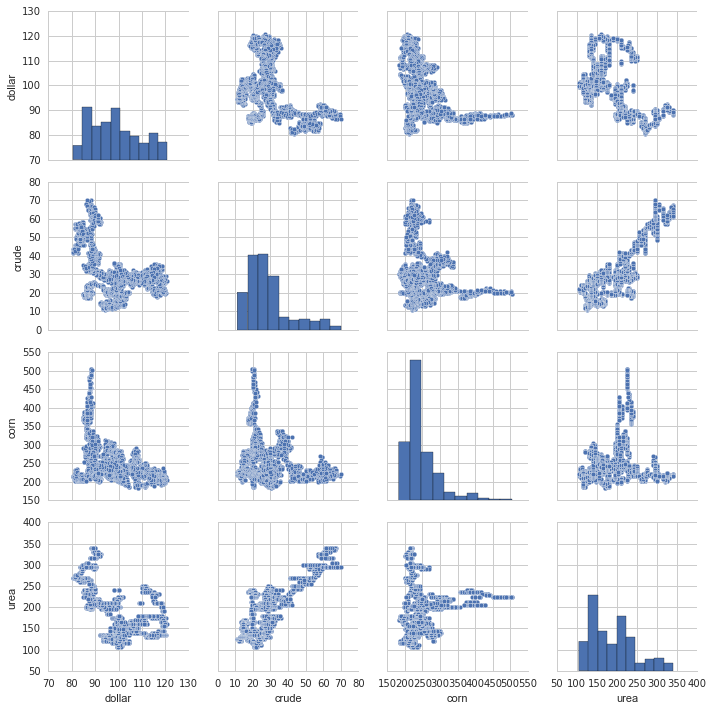

In [11]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
#cols= ['Spotdollar', '2monthcrude', '2monthcorn', '2monthurea','precipitation', 'temp']
sns.pairplot(sectionold, size=2.5);
plt.show()

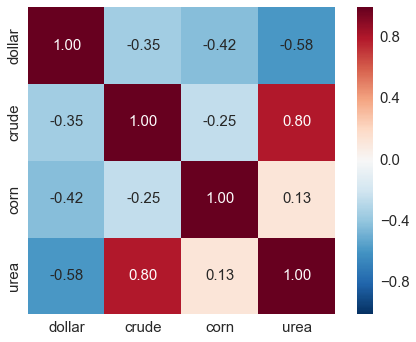

In [20]:
cols= ['dollar', 'crude', 'corn','urea']
cm = np.corrcoef(sectionold[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

### in machine learning don't need to really worry about outliers like in the mlr model

## Making rdf model with same number of trees and depth as the Spark document

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X=sectionold[['dollar', 'crude', 'corn']].values
y=sectionold['urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(n_estimators=200, criterion='mse',max_depth=10,random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 27.475, test: 78.586
R^2 train: 0.991, test: 0.973


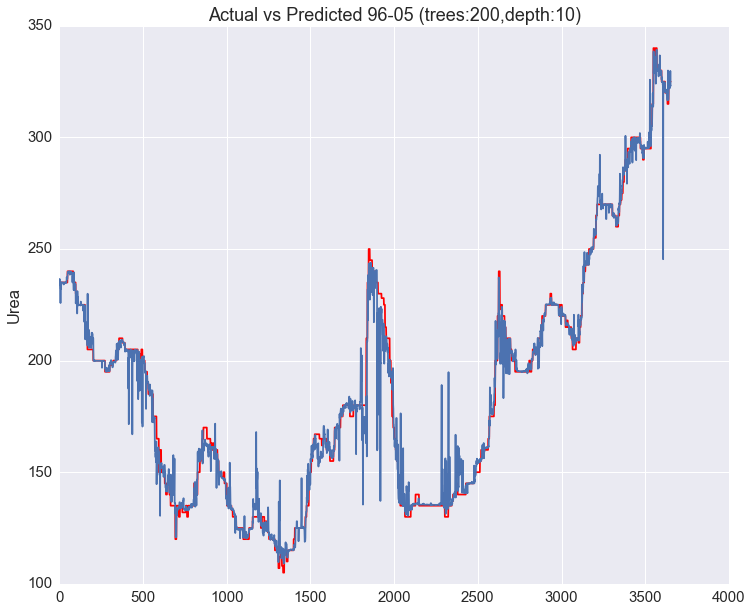

In [100]:

import matplotlib.pyplot as plt
#actual vs predicted
oldx = forest.predict(X)
plt.figure(figsize=(12,10))
plt.title("Actual vs Predicted 96-05 (trees:200,depth:10)")
plt.ylabel('Urea')
plt.plot(y,'r')
plt.plot(oldx)

In [101]:
#predict future values 2/26-3/8
print (forest.predict([98.148,34.58,359.5]))
print (forest.predict([98.211,35.58,357]))
print (forest.predict([98.352,36.15,355.75]))
print (forest.predict([98.214,36.3,356.25]))
print (forest.predict([97.592,36.33,356.5]))
print (forest.predict([97.34,37.75,358.25]))
print (forest.predict([97.071,39.82,359]))
print (forest.predict([97.255,38.77,359.5]))

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[ 166.67772546]
[ 172.475]
[ 173.325]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 173.425]
[ 174.025]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 174.3]
[ 174.3]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 174.3]


In [17]:
#I redid the rdf so that's why predictions above different, just use the ones given here
actual1 = 232
actual2 = 230
actual3 = 213
actual4 = 210
actual5 = 213
actual6 = 213
actual7 = 213
actual8 = 213
error1_s = abs(167- actual1)/actual1 * 100
error2_s = abs(172.25- actual2)/actual2 * 100
error3_s = abs(173.05- actual3)/actual3 * 100
error4_s = abs(173.15- actual4)/actual4 * 100
error5_s = abs(174.15 - actual5)/actual5 * 100
error6_s = abs(174.425- actual6)/actual6 * 100
error7_s = abs(174.425- actual7)/actual7 * 100
error8_s = abs(174.425 - actual8)/actual8 * 100
print (error1_s)
print (error2_s)
print (error3_s)
print (error4_s)
print (error5_s)
print (error6_s)
print (error7_s)
print (error8_s)

28.01724137931034
25.108695652173914
18.755868544600933
17.547619047619044
18.239436619718308
18.11032863849765
18.11032863849765
18.11032863849765


Random Forest with the number of trees and Max Depth: 
200-10


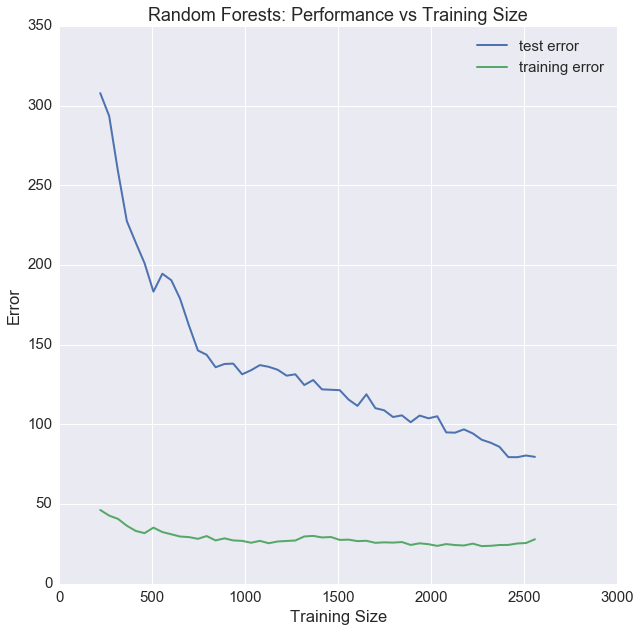

In [22]:
from sklearn import metrics
import numpy as np
def performance_metric(label, prediction):
    """Calculate and return the appropriate error performance metric."""
    
    mse = metrics.mean_squared_error(label, prediction)
    return mse

def learning_curve(num_of_trees,depth, X_train, y_train, X_test, y_test):
    """Calculate the performance of the model after a set of training data."""

    # vary the training set size so 50 different sizes
    sizes = np.round(np.linspace(220, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    print ("Random Forest with the number of trees and Max Depth: ")
    print (str(num_of_trees)+'-'+str(depth))

    for i, s in enumerate(sizes):

        # Create and fit the RandomForests regressor model
        regressor = RandomForestRegressor(n_estimators=num_of_trees,max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])

        # Find the performance on the training and testing set
        train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))


    # Plot learning curve graph
    learning_curve_graph(sizes, train_err, test_err)
    
def learning_curve_graph(sizes, train_err, test_err):
    """Plot training and test error as a function of the training size."""

    plt.figure(figsize=(10,10))
    plt.title('Random Forests: Performance vs Training Size')
    plt.plot(sizes, test_err, lw=2, label = 'test error')
    plt.plot(sizes, train_err, lw=2, label = 'training error')
    plt.legend()
    plt.xlabel('Training Size')
    plt.ylabel('Error')
    plt.show()
    
depth = 10
num_of_trees=200
learning_curve(num_of_trees,depth, X_train, y_train, X_test, y_test)

Model Complexity: 


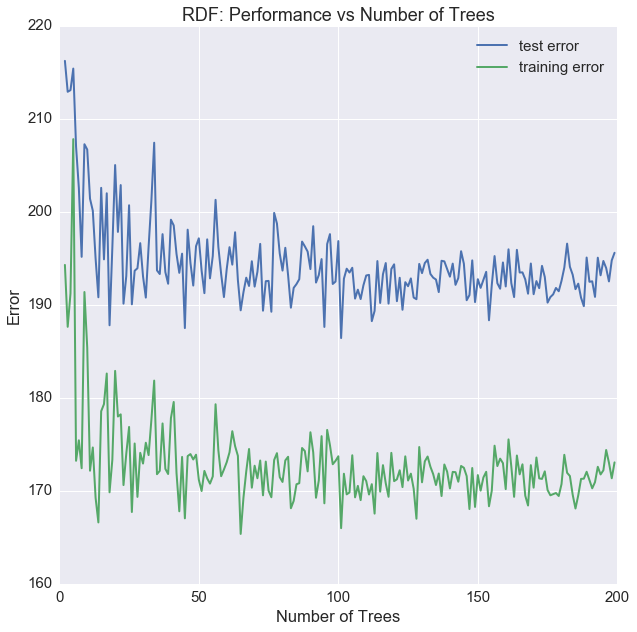

In [23]:
def model_complexity(X_train, y_train, X_test, y_test):
    """Calculate the performance of the model as model complexity increases."""

    print ("Model Complexity: ")

    # We will vary the number of tress from 2 to 150
    num_of_trees = np.arange(2, 200)
    train_err = np.zeros(len(num_of_trees))
    test_err = np.zeros(len(num_of_trees))

    for i, d in enumerate(num_of_trees):
        # Setup a Random Forest Regressor so that it learns with d trees
        regressor = RandomForestRegressor(n_estimators=d,max_depth=6)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    model_complexity_graph(num_of_trees, train_err, test_err)

def model_complexity_graph(num_of_trees, train_err, test_err):
    """Plot training and test error as a function of the number of trees in Random Forests learning."""

    plt.figure(figsize=(10,10))
    plt.title('RDF: Performance vs Number of Trees')
    plt.plot(num_of_trees, test_err, lw=2, label = 'test error')
    plt.plot(num_of_trees, train_err, lw=2, label = 'training error')
    plt.legend()
    plt.xlabel('Number of Trees')
    plt.ylabel('Error')
    plt.show()
    
model_complexity(X_train, y_train, X_test, y_test)

## Now finding the best model parameters

In [24]:
#do a few times to see which model parameters are the best overall
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [27]:
rdf_model_old = fit_predict_model(X_train,y_train)
print (rdf_model_old.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [29]:
y_predicted_new = rdf_model_old.predict(X_test)
rdf_mse_new = performance_metric(y_predicted_new,y_test)
print ('RandomForests Model - Mean Squared Error new is '+str(rdf_mse_new))

RandomForests Model - Mean Squared Error new is 77.7367806855


## Now do analysis on the model with the above parameters

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X=sectionold[['dollar', 'crude', 'corn']].values
y=sectionold['urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=150, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 26.837, test: 78.806
R^2 train: 0.991, test: 0.972


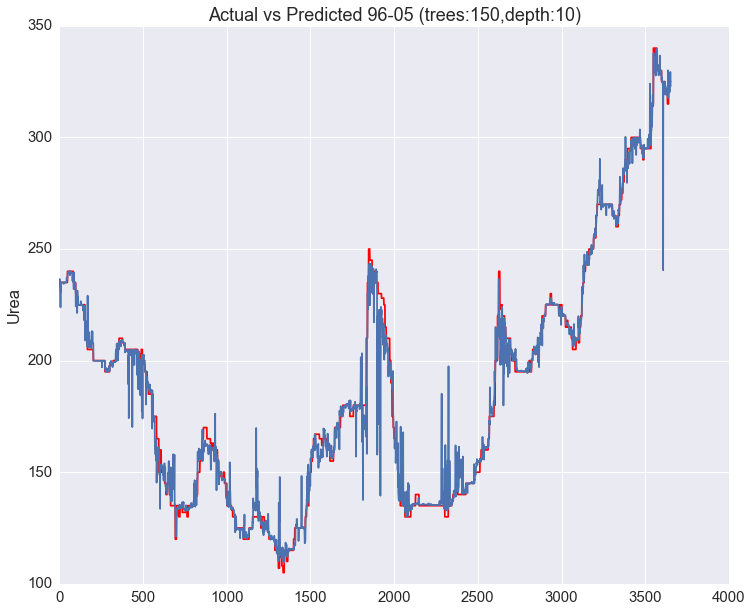

In [31]:
#actual vs predicted
oldx = forest.predict(X)
plt.figure(figsize=(12,10))
plt.title("Actual vs Predicted 96-05 (trees:150,depth:10)")
plt.ylabel('Urea')
plt.plot(y,'r')
plt.plot(oldx)

In [32]:
print (forest.predict([98.148,34.58,359.5]))
print (forest.predict([98.211,35.58,357]))
print (forest.predict([98.352,36.15,355.75]))
print (forest.predict([98.214,36.3,356.25]))
print (forest.predict([97.592,36.33,356.5]))
print (forest.predict([97.34,37.75,358.25]))
print (forest.predict([97.071,39.82,359]))
print (forest.predict([97.255,38.77,359.5]))

[ 166.82850578]
[ 172.5030303]
[ 173.23333333]
[ 173.53333333]
[ 174.36666667]
[ 174.36666667]
[ 174.36666667]
[ 174.36666667]


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

In [33]:
error1_s = abs(166.82850578- actual1)/actual1 * 100
error2_s = abs(172.5030303- actual2)/actual2 * 100
error3_s = abs(173.23333333- actual3)/actual3 * 100
error4_s = abs(173.53333333- actual4)/actual4 * 100
error5_s = abs(174.36666667 - actual5)/actual5 * 100
error6_s = abs(174.36666667- actual6)/actual6 * 100
error7_s = abs(174.36666667- actual7)/actual7 * 100
error8_s = abs(174.36666667 - actual8)/actual8 * 100
print (error1_s)
print (error2_s)
print (error3_s)
print (error4_s)
print (error5_s)
print (error6_s)
print (error7_s)
print (error8_s)

28.09116130172414
24.998682478260868
18.66979655868545
17.365079366666663
18.137715178403756
18.137715178403756
18.137715178403756
18.137715178403756


# 8/3/15-2/25/16, China market influence
[Top](#Table-of-Contents)

In [34]:
china = original[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn', '2monthurea']][1248:1457]
chinanew = china.dropna()
print(chinanew.shape)
chinanew.head()

(141, 5)


,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea
1250,8/3/15,97.494,45.56,376.50,278
1251,8/4/15,97.931,46.13,378.75,278
1252,8/5/15,97.958,45.55,383.25,280
1254,8/7/15,97.563,44.36,383.75,281
1257,8/10/15,97.159,45.66,401.00,282


In [35]:
chinanew.describe()

,Spotdollar,2monthcrude,2monthcorn,2monthurea
count,141.000000,141.000000,141.00000,141.000000
mean,97.275035,40.698582,377.83156,241.517730
std,1.598827,5.966633,11.87406,23.041764
min,93.332000,28.350000,357.50000,188.000000
25%,95.985000,35.200000,369.00000,228.000000
50%,97.288000,42.410000,375.00000,245.000000
75%,98.725000,45.920000,387.25000,254.000000
max,100.170000,50.140000,408.50000,283.000000


## Making rdf model with same parameters as used in Spark

In [37]:
X=chinanew[['Spotdollar', '2monthcrude', '2monthcorn']].values
y=chinanew['2monthurea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(n_estimators=200, criterion='mse',random_state=1,max_depth=10, n_jobs=-1,)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 13.713, test: 108.016
R^2 train: 0.974, test: 0.786


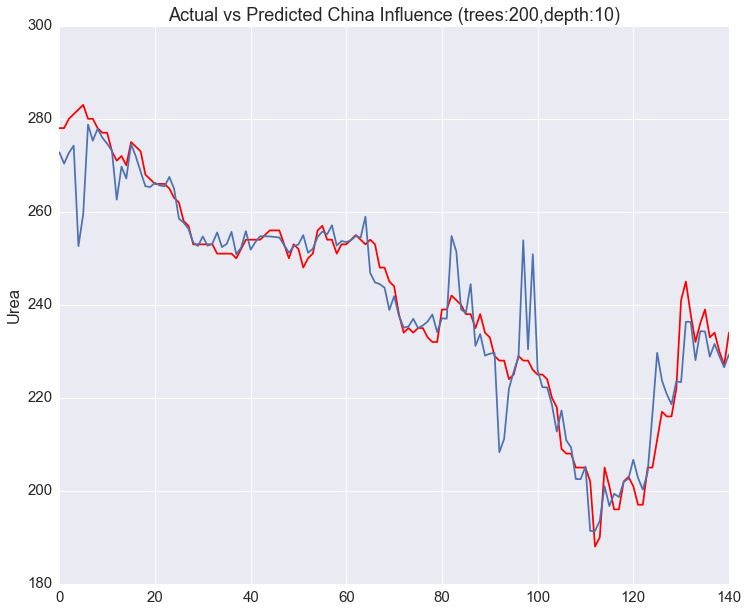

In [39]:
#actual vs predicted
chinax = forest.predict(X)
plt.figure(figsize=(12,10))
plt.title("Actual vs Predicted China Influence (trees:200,depth:10)")
plt.ylabel('Urea')
plt.plot(y,'r')
plt.plot(chinax)

In [40]:
print (forest.predict([98.148,34.58,359.5]))
print (forest.predict([98.211,35.58,357]))
print (forest.predict([98.352,36.15,355.75]))
print (forest.predict([98.214,36.3,356.25]))
print (forest.predict([97.592,36.33,356.5]))
print (forest.predict([97.34,37.75,358.25]))
print (forest.predict([97.071,39.82,359]))
print (forest.predict([97.255,38.77,359.5]))

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[ 217.365]
[ 220.805]
[ 221.495]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 221.87]
[ 225.4]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 226.875]
[ 266.815]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 241.41]


In [41]:
error1_s = abs(217.365- actual1)/actual1 * 100
error2_s = abs(220.805- actual2)/actual2 * 100
error3_s = abs(221.495- actual3)/actual3 * 100
error4_s = abs(221.87- actual4)/actual4 * 100
error5_s = abs(225.4 - actual5)/actual5 * 100
error6_s = abs(226.875 - actual6)/actual6 * 100
error7_s = abs(266.815- actual7)/actual7 * 100
error8_s = abs(241.41- actual8)/actual8 * 100
print (error1_s)
print (error2_s)
print (error3_s)
print (error4_s)
print (error5_s)
print (error6_s)
print (error7_s)
print (error8_s)

6.308189655172409
3.9978260869565183
3.9882629107981247
5.6523809523809545
5.821596244131458
6.514084507042253
25.26525821596244
13.338028169014082


## Now finding the best model parameters

In [42]:
#do a few times to see which model parameters are the best overall
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [48]:
rdf_model_china = fit_predict_model(X_train,y_train)
print (rdf_model_china.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


## Now do analysis on the model with the above parameters

In [61]:
X=chinanew[['Spotdollar', '2monthcrude', '2monthcorn']].values
y=chinanew['2monthurea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=175, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 16.726, test: 102.757
R^2 train: 0.969, test: 0.797


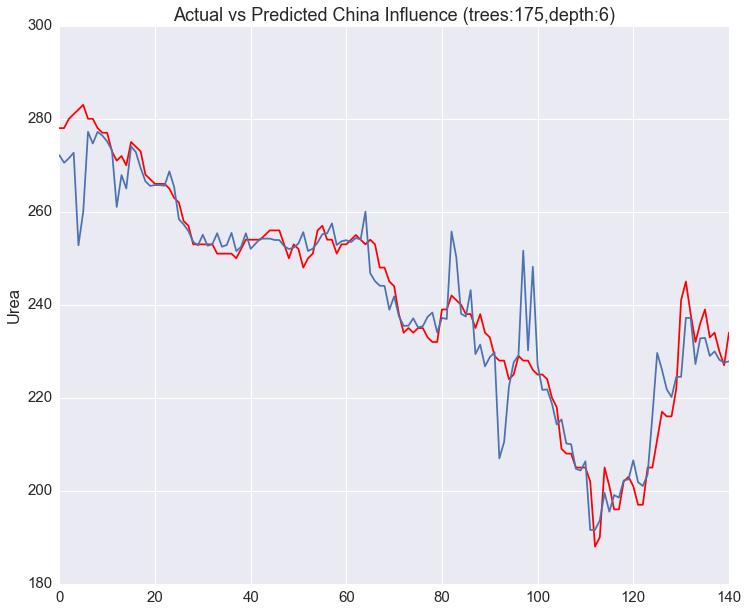

In [62]:
#actual vs predicted
chinax = forest.predict(X)
plt.figure(figsize=(12,10))
plt.title("Actual vs Predicted China Influence (trees:175,depth:6)")
plt.ylabel('Urea')
plt.plot(y,'r')
plt.plot(chinax)

In [63]:
print (forest.predict([98.148,34.58,359.5]))
print (forest.predict([98.211,35.58,357]))
print (forest.predict([98.352,36.15,355.75]))
print (forest.predict([98.214,36.3,356.25]))
print (forest.predict([97.592,36.33,356.5]))
print (forest.predict([97.34,37.75,358.25]))
print (forest.predict([97.071,39.82,359]))
print (forest.predict([97.255,38.77,359.5]))

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

[ 215.40184493]
[ 218.29755468]
[ 219.17177237]
[ 220.12177237]
[ 223.09843921]
[ 223.72983603]
[ 264.25660697]
[ 240.85666588]


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [64]:
error1_s = abs(215.40184493- actual1)/actual1 * 100
error2_s = abs(218.29755468- actual2)/actual2 * 100
error3_s = abs(219.17177237- actual3)/actual3 * 100
error4_s = abs(220.12177237- actual4)/actual4 * 100
error5_s = abs(223.09843921- actual5)/actual5 * 100
error6_s = abs(223.72983603- actual6)/actual6 * 100
error7_s = abs(264.25660697- actual7)/actual7 * 100
error8_s = abs(240.85666588- actual8)/actual8 * 100
print (error1_s)
print (error2_s)
print (error3_s)
print (error4_s)
print (error5_s)
print (error6_s)
print (error7_s)
print (error8_s)

7.154377185344823
5.08801970434783
2.8975457136150298
4.819891604761906
4.741051272300474
5.037481704225353
24.064134727699535
13.078246892018782


# Sec1 2012-now
[Top](#Table-of-Contents)

In [2]:
data = pd.read_csv("C:/Users/msteinme/Documents/project1revisit2csv.csv")
sec1 = data[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn','2monthurea']]
sec1 = sec1.dropna()
sec1.tail()

,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea
1450,2/19/2016,96.600,31.75,369.25,233
1453,2/22/2016,97.379,33.39,372.25,234
1454,2/23/2016,97.481,33.60,366.75,230
1455,2/24/2016,97.458,34.07,364.50,227
1456,2/25/2016,97.287,34.83,360.50,234


In [3]:
sec1.describe()

,Spotdollar,2monthcrude,2monthcorn,2monthurea
count,985.000000,985.000000,985.000000,985.000000
mean,85.761370,81.614183,503.430711,336.541117
std,7.045145,23.253493,140.272537,68.117296
min,78.709000,28.350000,333.500000,188.000000
25%,80.287000,58.680000,384.750000,286.000000
50%,82.247000,92.630000,450.750000,320.000000
75%,94.201000,98.670000,620.750000,405.000000
max,100.330000,109.520000,838.750000,525.000000


## Making rdf model with same parameters as used in Spark

In [103]:
X=sec1[['Spotdollar', '2monthcrude', '2monthcorn']].values
y=sec1['2monthurea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(n_estimators=150,max_depth=10, criterion='mse',random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 83.999, test: 294.932
R^2 train: 0.981, test: 0.939


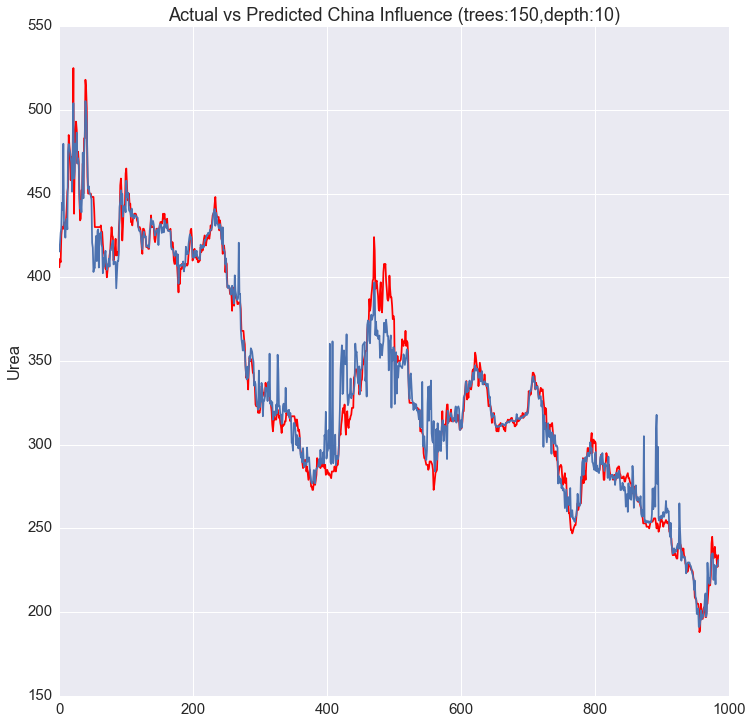

In [104]:
sec1x = forest.predict(X)
plt.figure(figsize=(12,12))
plt.title("Actual vs Predicted China Influence (trees:150,depth:10)")
plt.ylabel('Urea')
plt.plot(y,'r')
plt.plot(sec1x)

In [105]:
print (forest.predict([98.148,34.58,359.5]))
print (forest.predict([98.211,35.58,357]))
print (forest.predict([98.352,36.15,355.75]))
print (forest.predict([98.214,36.3,356.25]))
print (forest.predict([97.592,36.33,356.5]))
print (forest.predict([97.34,37.75,358.25]))
print (forest.predict([97.071,39.82,359]))
print (forest.predict([97.255,38.77,359.5]))

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[ 220.49107937]
[ 225.91274603]
[ 225.74874603]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 226.37957937]
[ 228.82807143]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 230.11376984]
[ 253.96640548]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)



[ 232.10865873]


In [106]:
error1_s = abs(220.4910794- actual1)/actual1 * 100
error2_s = abs(225.91274603- actual2)/actual2 * 100
error3_s = abs(225.74874603- actual3)/actual3 * 100
error4_s = abs(226.37957937- actual4)/actual4 * 100
error5_s = abs(228.82807143- actual5)/actual5 * 100
error6_s = abs(230.11376984- actual6)/actual6 * 100
error7_s = abs(253.96640548- actual7)/actual7 * 100
error8_s = abs(232.10865873- actual8)/actual8 * 100
print (error1_s)
print (error2_s)
print (error3_s)
print (error4_s)
print (error5_s)
print (error6_s)
print (error7_s)
print (error8_s)

4.960741637931039
1.7770669434782635
5.98532677464789
7.799799699999994
7.431019450704222
8.034633727699532
19.233054215962436
8.971201281690142


## Now finding the best model parameters

In [71]:
#do a few times to see which model parameters are the best overall
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [73]:
rdf_model_sec1 = fit_predict_model(X_train,y_train)
print (rdf_model_sec1.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


## Now do analysis on the model with the above parameters 

In [75]:
X=sec1[['Spotdollar', '2monthcrude', '2monthcorn']].values
y=sec1['2monthurea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=200, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 88.806, test: 291.120
R^2 train: 0.980, test: 0.940


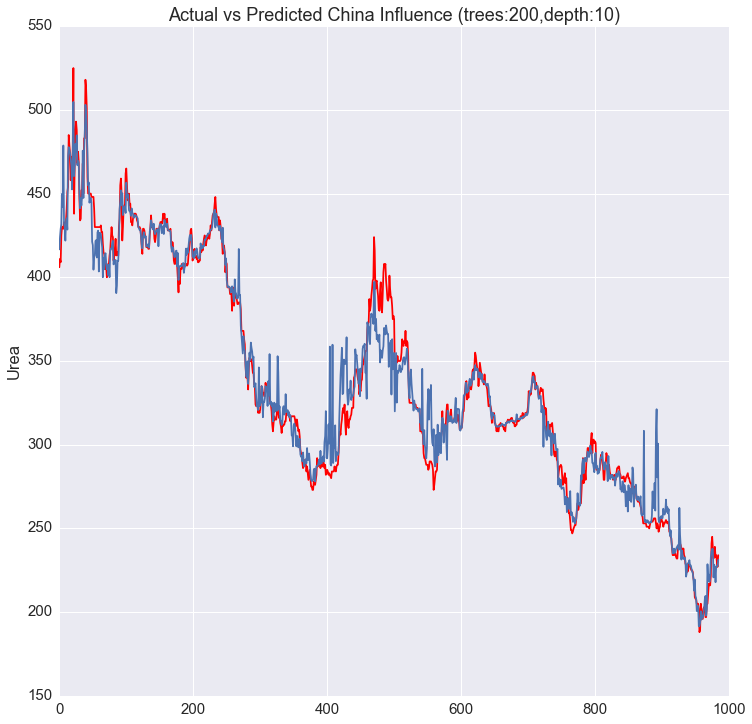

In [76]:
sec1x = forest.predict(X)
plt.figure(figsize=(12,12))
plt.title("Actual vs Predicted China Influence (trees:200,depth:10)")
plt.ylabel('Urea')
plt.plot(y,'r')
plt.plot(sec1x)

In [77]:
print (forest.predict([98.148,34.58,359.5]))
print (forest.predict([98.211,35.58,357]))
print (forest.predict([98.352,36.15,355.75]))
print (forest.predict([98.214,36.3,356.25]))
print (forest.predict([97.592,36.33,356.5]))
print (forest.predict([97.34,37.75,358.25]))
print (forest.predict([97.071,39.82,359]))
print (forest.predict([97.255,38.77,359.5]))

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

[ 221.07085714]
[ 226.01160714]
[ 225.56375]
[ 226.05535714]
[ 228.58973214]
[ 230.21708333]
[ 256.08949854]
[ 231.94]


In [78]:
error1_s = abs(221.07085714- actual1)/actual1 * 100
error2_s = abs(226.01160714- actual2)/actual2 * 100
error3_s = abs(225.56375- actual3)/actual3 * 100
error4_s = abs(226.05535714- actual4)/actual4 * 100
error5_s = abs(228.58973214 - actual5)/actual5 * 100
error6_s = abs(230.21708333- actual6)/actual6 * 100
error7_s = abs(256.08949854- actual7)/actual7 * 100
error8_s = abs(231.94- actual8)/actual8 * 100
print (error1_s)
print (error2_s)
print (error3_s)
print (error4_s)
print (error5_s)
print (error6_s)
print (error7_s)
print (error8_s)

4.710837439655178
1.734083852173915
5.898474178403755
7.6454081619047685
7.319123070422533
8.083137713615027
20.22981152112677
8.892018779342722


# Green Markets
[Top](#Table-of-Contents)

In [79]:
green = original[['latestdate', 'crude.1', 'urea.1']][0:755]
print(green.shape)
green.tail()

(755, 3)


,latestdate,crude.1,urea.1
750,2/21/16,31.75,295
751,2/22/16,33.39,295
752,2/23/16,33.60,295
753,2/24/16,34.07,295
754,2/25/16,34.83,295


In [80]:
green.describe()

,crude.1,urea.1
count,755.000000,755.000000
mean,67.265894,382.688742
std,24.808647,57.373917
min,28.350000,255.000000
25%,46.610000,345.000000
50%,58.530000,385.000000
75%,96.630000,435.000000
max,106.830000,470.000000


In [82]:
X=green[['crude.1']].values
y=green['urea.1'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(n_estimators=150,max_depth=10, criterion='mse',random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 110.947, test: 274.820
R^2 train: 0.965, test: 0.921


In [83]:
def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [86]:
rdf_model_green = fit_predict_model(X_train,y_train)
print (rdf_model_green.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


## Now do analysis on the model with the above parameters 

In [92]:
X=green[['crude.1']].values
y=green['urea.1'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=125, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 286.170, test: 336.997
R^2 train: 0.911, test: 0.903


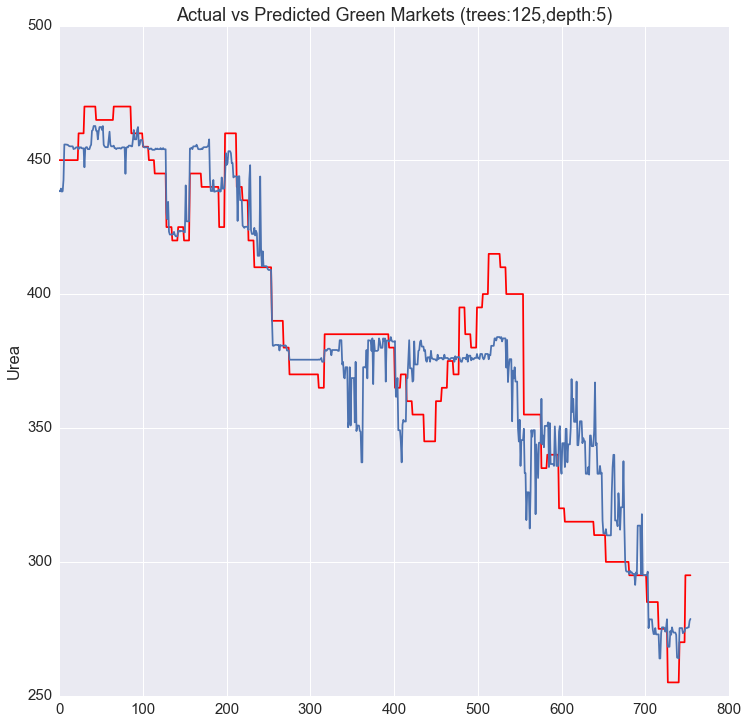

In [93]:
sec1x = forest.predict(X)
plt.figure(figsize=(12,12))
plt.title("Actual vs Predicted Green Markets (trees:125,depth:5)")
plt.ylabel('Urea')
plt.plot(y,'r')
plt.plot(sec1x)

In [94]:
actual = 305
#crude = 34.58 ,35.58,36.15,36.3,36.33,37.75,39.82,38.77
print (forest.predict([34.58]))
print (forest.predict([35.58]))
print (forest.predict([36.15]))
print (forest.predict([36.3]))
print (forest.predict([36.33]))
print (forest.predict([37.75]))
print (forest.predict([39.82]))
print (forest.predict([38.77]))

[ 278.52830808]
[ 268.53643813]
[ 295.51464613]
[ 296.06758916]
[ 296.06758916]
[ 295.34207869]
[ 343.84598791]
[ 306.08640117]


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

In [96]:
error1_g = abs(278.52830808 - actual)/actual * 100
error2_g = abs(268.53643813 - actual)/actual * 100
error3_g = abs(295.51464613- actual)/actual * 100
error4_g = abs(296.06758916 - actual)/actual * 100
error5_g = abs(296.06758916 - actual)/actual * 100
error6_g = abs(295.34207869 - actual)/actual * 100
error7_g = abs(343.84598791 - actual)/actual * 100
error8_g = abs(306.08640117 - actual)/actual * 100
print (error1_g)
print (error2_g)
print (error3_g)
print (error4_g)
print (error5_g)
print (error6_g)
print (error7_g)
print (error8_g)

8.67924325245902
11.955266186885238
3.109952088524585
2.928659291803275
2.928659291803275
3.166531577049182
12.736389478688531
0.3561971049180288
